## My problem is to generate some MCQ based on the paragraph given

In [1]:
# The required modules are
import pandas as pd
from IPython.display import Markdown, display, clear_output
import _pickle as cPickle
from pathlib import Path



import spacy
from spacy import displacy
nlp = spacy.load('en_core_web_sm')
from spacy import displacy


#For loading the glove
import gensim
from gensim.test.utils import datapath, get_tmpfile
from gensim.models import KeyedVectors
from gensim.scripts.glove2word2vec import glove2word2vec

glove_file = 'data/embeddings/glove.6B.300d.txt'
tmp_file = 'data/embeddings/word2vec-glove.6B.300d.txt'

In [2]:
glove2word2vec(glove_file, tmp_file)
model = KeyedVectors.load_word2vec_format(tmp_file)

In [3]:
def printGrammerPOS(inputString):
    doc = nlp(inputString)
    for token in doc:
        print(token.text, token.lemma_, token.pos_, token.tag_, token.dep_,token.shape_, token.is_alpha, token.is_stop)
    

a = printGrammerPOS('Delhi is the capital of India.')

Delhi delhi PROPN NNP nsubj Xxxxx True False
is be VERB VBZ ROOT xx True True
the the DET DT det xxx True True
capital capital NOUN NN attr xxxx True False
of of ADP IN prep xx True True
India india PROPN NNP pobj Xxxxx True False
. . PUNCT . punct . False False


In [4]:
def retunPOS(inputString):
    doc = nlp(inputString)
    se = []
    lis = []
    for token in doc:
        se = [token.text,token.pos_]
        lis.append(se)
    print(lis)
retunPOS('The head of the pigeon had been blown away with the rifle.')

[['The', 'DET'], ['head', 'NOUN'], ['of', 'ADP'], ['the', 'DET'], ['pigeon', 'NOUN'], ['had', 'VERB'], ['been', 'VERB'], ['blown', 'VERB'], ['away', 'ADV'], ['with', 'ADP'], ['the', 'DET'], ['rifle', 'NOUN'], ['.', 'PUNCT']]


In [5]:
def retunVerb(inputString):
    doc = nlp(inputString)
    temp = []
    lis = []
    se = []
    
    indexCount = 0
    for token in doc:
        if(token.pos_ == 'VERB' and not(token.is_stop)):
            se = [token.text,indexCount]
            
            lis.append(se)
        indexCount = indexCount + 1
#     print(lis)
    return(lis)
a = retunVerb('The head of the pigeon had been blown away with the rifle.')
print(a)

[['blown', 7]]


In [6]:
def returnNoun(inputString):
    doc = nlp(inputString)
    lis = []
    se = []
    indexCount = 0
    for token in doc:
        if(token.pos_ =='NOUN' and not(token.is_stop)):
            se = [token.text,indexCount]
            lis.append(se)
        indexCount = indexCount + 1
    print(lis)
    
    
returnNoun('The head of the pigeon had been blown away with the rifle')

[['head', 1], ['pigeon', 4], ['rifle', 11]]


In [7]:
#This can include the fill in the blanks
def generateFillintheblanks(inputString,key):
    stri = inputString.split() # Replace the key with index
    stri[key[1]] = '..........'
    output = ''
    #combine the string 
    for i in range(len(stri)):
        output = output + ' ' + stri[i]    
    return(output)

generateFillintheblanks('My name is Vyshak Puthusseri.',['is',2])

' My name .......... Vyshak Puthusseri.'

In [8]:
# Generate the distractor
def generateDistractor(answer,count):
    '''I had choosed the verb as the key , so the most similar words in the glove will result the 
    other forms of the current word, a simple technique for the distractor.'''
    answer = str.lower(answer)
    
    ##Extracting closest words for the answer. 
    try:
        closestWords = model.most_similar(positive=[answer], topn=count)
    except:
        #In case the word is not in the vocabulary, or other problem not loading embeddings
        return []
    #Return count many distractors
    distractors = list(map(lambda x: x[0], closestWords))[0:count]
    return distractors

generateDistractor('blew',4)

['blowing', 'blown', 'ripped', 'exploded']

In [9]:
questionCount = 1
def returnQuestionSet(sentence):
    global questionCount
    verbs = retunVerb(sentence)
    que = generateFillintheblanks(sentence,verbs[0])
    distractor = generateDistractor( verbs[0][0],3)
    print("\n",questionCount,que)
    questionCount = questionCount + 1
    print("a.",distractor[0],"\nb.",distractor[1])
    print("c.",distractor[2],"\nd.",verbs[0][0])

returnQuestionSet('My friends are running in the palace.')


 1  My friends are .......... in the palace.
a. ran 
b. run
c. line 
d. running


In [10]:

    
returnQuestionSet('Your friends waited for you for over an hour.')
returnQuestionSet('It is not worth paying so much money for this concert.')    
returnQuestionSet('When I reached the station, the train had left.')
returnQuestionSet('I visited the Taj Mahal last month.')

returnQuestionSet('The criminal attacked the victim with a blunt object.')
returnQuestionSet('His company is greatly sought after.')    
returnQuestionSet('The terrified people fled to the mountains.')



 2  Your friends .......... for you for over an hour.
a. waiting 
b. wait
c. patiently 
d. waited

 3  It is not worth .......... so much money for this concert.
a. pay 
b. paid
c. fees 
d. paying

 4  When I .......... the station, the train had left.
a. reaching 
b. reach
c. reaches 
d. reached

 5  I .......... the Taj Mahal last month.
a. visit 
b. visiting
c. traveled 
d. visited

 6  The criminal .......... the victim with a blunt object.
a. attack 
b. attacking
c. assaulted 
d. attacked

 7  His company is greatly .......... after.
a. seeking 
b. seek
c. tried 
d. sought

 8  The terrified people .......... to the mountains.
a. fleeing 
b. flee
c. escaped 
d. fled


In [12]:
para = '''My friends are eating in the palace. Your friends waited for you for over an hour. It is not worth paying so much money for this concert. When I reached the station, the train had left. I visited the Taj Mahal last month. The criminal attacked the victim with a blunt object. His company is greatly sought after. The terrified people fled to the mountains.'''

## Return all the question sets

In [15]:
# retun quesion set from a sentence
import nltk
from nltk.tokenize import sent_tokenize
questionCount = 0
def returnQuestionSetasList(sentence):
    global questionCount
    verbs = retunVerb(sentence)
    que = generateFillintheblanks(sentence,verbs[0])
    distractor = generateDistractor( verbs[0][0],3)
    print("\n",questionCount,que)
    print("a.",distractor[0],"\nb.",distractor[1])
    print("c.",distractor[2],"\nd.",verbs[0][0])
    questionCount = questionCount + 1
    li = []
    li.append(questionCount)
    li.append(que)
    li.append(distractor[0])
    li.append(distractor[1])
    li.append(distractor[2])
    li.append(verbs[0][0])
    return li


# Now given a paragraph , return all the quesions
def returnAllQuestions(paragraph):
    "This can be directly use inside the flask for displaying the result. Just use a for loop to traverse."
    li = []
    sentences = sent_tokenize(para)
    for sentence in sentences:
        li.append(returnQuestionSetasList(sentence))
    return(li)

returnAllQuestions(para)


 0  My friends are .......... in the palace.
a. eat 
b. ate
c. eaten 
d. eating

 1  Your friends .......... for you for over an hour.
a. waiting 
b. wait
c. patiently 
d. waited

 2  It is not worth .......... so much money for this concert.
a. pay 
b. paid
c. fees 
d. paying

 3  When I .......... the station, the train had left.
a. reaching 
b. reach
c. reaches 
d. reached

 4  I .......... the Taj Mahal last month.
a. visit 
b. visiting
c. traveled 
d. visited

 5  The criminal .......... the victim with a blunt object.
a. attack 
b. attacking
c. assaulted 
d. attacked

 6  His company is greatly .......... after.
a. seeking 
b. seek
c. tried 
d. sought

 7  The terrified people .......... to the mountains.
a. fleeing 
b. flee
c. escaped 
d. fled


[[1,
  ' My friends are .......... in the palace.',
  'eat',
  'ate',
  'eaten',
  'eating'],
 [2,
  ' Your friends .......... for you for over an hour.',
  'waiting',
  'wait',
  'patiently',
  'waited'],
 [3,
  ' It is not worth .......... so much money for this concert.',
  'pay',
  'paid',
  'fees',
  'paying'],
 [4,
  ' When I .......... the station, the train had left.',
  'reaching',
  'reach',
  'reaches',
  'reached'],
 [5,
  ' I .......... the Taj Mahal last month.',
  'visit',
  'visiting',
  'traveled',
  'visited'],
 [6,
  ' The criminal .......... the victim with a blunt object.',
  'attack',
  'attacking',
  'assaulted',
  'attacked'],
 [7,
  ' His company is greatly .......... after.',
  'seeking',
  'seek',
  'tried',
  'sought'],
 [8,
  ' The terrified people .......... to the mountains.',
  'fleeing',
  'flee',
  'escaped',
  'fled']]

## Dispay the delpendencies using the displacy

In [ ]:
def displayTheDependency(inputString):
    doc = nlp(inputString)
    displacy.render(doc, style="dep",page = "true",jupyter='True')
 

displayTheDependency('Delhi is the capital of India.')   

# Summerisation (But not working as expected)

In [17]:
import spacy
from spacy.lang.en.stop_words import STOP_WORDS
from string import punctuation

In [18]:
extra_words=list(STOP_WORDS)+list(punctuation)+['\n']
nlp=spacy.load('en')
doc = """Memory Management
Memory management refers to management of Primary Memory or Main Memory. Main memory is a large array of words or bytes where each word or byte has its own address.

Main memory provides a fast storage that can be accessed directly by the CPU. For a program to be executed, it must in the main memory. An Operating System does the following activities for memory management −

Keeps tracks of primary memory, i.e., what part of it are in use by whom, what part are not in use.

In multiprogramming, the OS decides which process will get memory when and how much.

Allocates the memory when a process requests it to do so.

De-allocates the memory when a process no longer needs it or has been terminated.

Processor Management
In multiprogramming environment, the OS decides which process gets the processor when and for how much time. This function is called process scheduling. An Operating System does the following activities for processor management −

Keeps tracks of processor and status of process. The program responsible for this task is known as traffic controller.

Allocates the processor (CPU) to a process.

De-allocates processor when a process is no longer required.

Device Management
An Operating System manages device communication via their respective drivers. It does the following activities for device management −

Keeps tracks of all devices. Program responsible for this task is known as the I/O controller.

Decides which process gets the device when and for how much time.

Allocates the device in the efficient way.

De-allocates devices.

File Management
A file system is normally organized into directories for easy navigation and usage. These directories may contain files and other directions.

An Operating System does the following activities for file management −

Keeps track of information, location, uses, status etc. The collective facilities are often known as file system.

Decides who gets the resources.

Allocates the resources.

De-allocates the resources."""
docx = nlp(doc)

In [ ]:
docx

In [20]:
# Create the vocabulary
all_words=[word.text for word in docx]
Freq_word={}
for w in all_words:
    w1=w.lower()
    if w1 not in extra_words and w1.isalpha():
        if w1 in Freq_word.keys():
            Freq_word[w1]+=1
        else:
            Freq_word[w1]=1

In [ ]:
Freq_word

In [22]:
# Headline generation
val=sorted(Freq_word.values())
max_freq=val[-3:]
print("Topic of document given :-")
for word,freq in Freq_word.items():
    if freq in max_freq:
        print(word ,end=" ")
    else:
        continue

Topic of document given :-
memory management process 

In [23]:
# TFIDF
for word in Freq_word.keys():
    Freq_word[word] = (Freq_word[word]/max_freq[-1])

In [24]:
#sentence Strength
sent_strength={}
for sent in docx.sents:
    for word in sent :
        if word.text.lower() in Freq_word.keys():
            if sent in sent_strength.keys():
                sent_strength[sent]+=Freq_word[word.text.lower()]
            else:
                sent_strength[sent]=Freq_word[word.text.lower()]
        else: 
            continue

In [25]:
sent_strength

{Memory Management
 Memory management refers to management of Primary Memory or Main Memory.: 7.083333333333334,
 Main memory is a large array of words or bytes where each word or byte has its own address.
 : 1.916666666666666,
 Main memory provides a fast storage that can be accessed directly by the CPU.: 1.9166666666666663,
 For a program to be executed, it must in the main memory.: 1.6666666666666665,
 An Operating System does the following activities for memory management −
 : 3.3333333333333335,
 Keeps tracks of primary memory, i.e., what part of it are in use by whom, what part are not in use.
 : 2.0833333333333335,
 In multiprogramming, the OS decides which process will get memory when and how much.
 : 2.4166666666666665,
 Allocates the memory when a process requests it to do so.
 : 2.5,
 De-allocates the memory when a process no longer needs it or has been terminated.
 : 3.0833333333333335,
 Processor Management: 1.3333333333333335,
 In multiprogramming environment, the OS deci

In [26]:
## Create important sentence
top_sentences=(sorted(sent_strength.values())[::-1])
top30percent_sentence=int(0.3*len(top_sentences))
top_sent=top_sentences[:top30percent_sentence]

In [ ]:
#final summary
summary=[]
for sent,strength in sent_strength.items():
    if strength in top_sent:
        summary.append(sent)
    else:
        continue

for i in summary:
    print(i,end="")

## NLTK chunking the content from

In [29]:
## Factoid  based one
from textblob import TextBlob
import nltk
import re
import wikipedia as wiki
import string,sys,os


In [43]:
page = wiki.page('Deadlock')
summary = TextBlob(page.summary)
text = summary
sentences=nltk.sent_tokenize(str(text))

In [44]:
sentences


['In concurrent computing, a deadlock is a state in which each member of a group is waiting for another member, including itself, to take action, such as sending a message or more commonly releasing a lock.',
 'Deadlock is a common problem in multiprocessing systems, parallel computing, and distributed systems, where software and hardware locks are used to arbitrate shared resources and implement process synchronization.In an operating system, a deadlock occurs when a process or thread enters a waiting state because a requested system resource is held by another waiting process, which in turn is waiting for another resource held by another waiting process.',
 'If a process is unable to change its state indefinitely because the resources requested by it are being used by another waiting process, then the system is said to be in a deadlock.In a communications system, deadlocks occur mainly due to lost or corrupt signals rather than resource contention.']

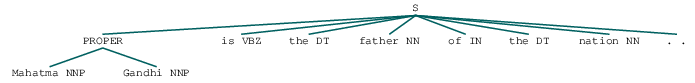

In [36]:

def get_chunked_data(s):
    tokens = nltk.word_tokenize(s)
    tagged = nltk.pos_tag(tokens)
    # print tagged
    grammar =   """  
                NUMBER: {<$>*<CD>+<NN>*}
                LOCATION: {<IN><NNP>|<,|IN><NNP>+} 
                PROPER: {<NNP|NNPS>+}
                """       
    chunker = nltk.RegexpParser(grammar)
    chunked = chunker.parse(tagged)
    # chunked=nltk.ne_chunk(tagged)
    # print chunked
    return chunked
get_chunked_data("Mahatma Gandhi is the father of the nation.")